# GRIP Internship

### Task: 01 - Prediction using Supervised ML

## By: Urfa Ansari

#### Target :
1. Predict the percentage of an student based on the no. of study hours.
2. What will be predicted score if a student studies for 9.25 hrs/ day?
<hr>

_Import required Packages and Classes_

In [94]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

_Read the dataset_

In [95]:
url = "http://bit.ly/w-data"
students_data = pd.read_csv(url)

Look and Understand that what the data says by performing different operations

In [96]:
students_data.shape
#This will give us the numbers of rows and coloumns in the dataset

(25, 2)

In [97]:
students_data.head()
#This will display the first 5 rows of the dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [98]:
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [99]:
students_data.isnull().sum()
#This will display the null or empty coloumns

Hours     0
Scores    0
dtype: int64

In [100]:
students_data.describe()
#This will give the statistical information o the dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


_Plot Hours(x) vlaue vs. Score(y)_

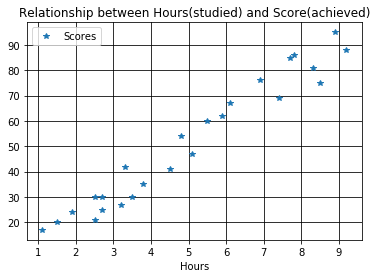

In [102]:
students_data.plot(x="Hours", y="Scores", style="*")
plt.title("Relationship between Hours(studied) and Score(achieved)")
plt.grid(color='Black')
plt.show()

From the above graph it is very clear that there is a positive linear relationship(slope) between the number of hours studied and marks scored. Since there is one dependent variable(y) and one independent variable(x) so here we will implement Linear Regression <br><hr>
<br>
Now we will select our Prediction Target and Choose our Feautres for building our model

In [103]:
y = students_data['Scores'].values #This(Y) is our prediction target for this model
X = students_data.drop("Scores",axis=1).values #This(x) is our chosen feature for building this model

### Create a Regression model and fit it with existing  values from the dataset

#### Fitting a Regression Model

In [104]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)#fit the model
prediction_space = np.linspace(min(X),max(X)).reshape(-1, 1)
print("Training Completed")

Training Completed


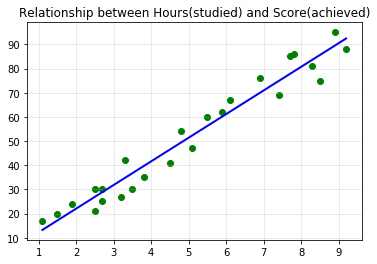

In [107]:
#Plotting the Regression Line
plt.scatter(X, y, color='green')
plt.plot(prediction_space, reg.predict(prediction_space), color='blue', linewidth=2)
plt.title("Relationship between Hours(studied) and Score(achieved)")
plt.grid(alpha=0.3)
plt.show()

##### Linear Regression on all the features

In [108]:
predict_y = reg.predict(X_test)
print(predict_y)

[17.14737849 33.76624426 74.8246185  26.92318188 60.16091341 39.63172629
 21.05769985]


In [109]:
#Actual vs Predicted Score Board
score_board = pd.DataFrame({'Actual': y_test, 'Predicted': predict_y })
score_board

,Actual,Predicted
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913
5,35,39.631726
6,24,21.057700


### Visualising the  result

### 1.Train Set

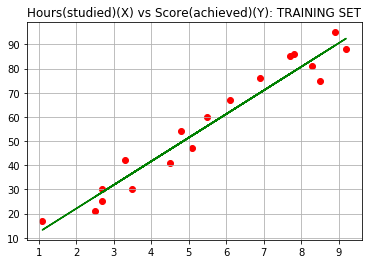

In [110]:
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train,reg.predict(X_train),color = 'green')
plt.title("Hours(studied)(X) vs Score(achieved)(Y): TRAINING SET")
plt.grid()
plt.show()

### 2. Test Set

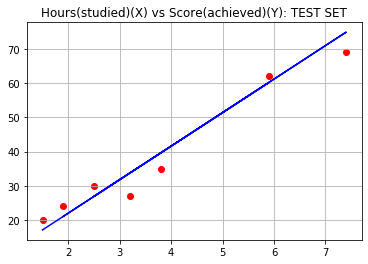

In [111]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test,reg.predict(X_test),color = 'blue')
plt.title("Hours(studied)(X) vs Score(achieved)(Y): TEST SET")
plt.grid()
plt.show()

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.94


## Apply the model for prediction

# ~> What will be the predicted score if a student studies for 9.25hrs/day? 

In [114]:
Hours = float(input("Enter the number of hours studied: "))

Enter the number of hours studied: 9.25


In [115]:
Hours = [[Hours]]
lr.predict(Hours)

array([93.89272889])

The predicted score if a student studies for 9.25 hrs/ day score is _93.89%_